In [ ]:
!unrar x "/content/drive/MyDrive/DatasetsFinal.rar" "/content/"


UNRAR 5.61 beta 1 freeware      Copyright (c) 1993-2018 Alexander Roshal


Extracting from /content/drive/MyDrive/DatasetsFinal.rar


Would you like to replace the existing file /content/Datasets2-8/Meta/classes.txt
   389 bytes, modified on 2023-07-16 11:32
with a new one
   389 bytes, modified on 2023-07-16 11:32

[Y]es, [N]o, [A]ll, n[E]ver, [R]ename, [Q]uit 
User break

User break


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model

In [ ]:
train_data_dir = '/content/Datasets2-8/Train'
test_data_dir = '/content/Datasets2-8/Test'
img_width, img_height = 224, 224
batch_size = 32

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 7000 images belonging to 11 classes.
Found 1750 images belonging to 11 classes.


In [ ]:
base_model = VGG16(weights=None, include_top=False, input_shape=(img_width, img_height, 3))

x = base_model.output
x = Flatten()(x)
predictions = Dense(11, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

epochs = 30
steps_per_epoch = train_generator.n // train_generator.batch_size
validation_steps = validation_generator.n // validation_generator.batch_size

model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_steps
)

Epoch 1/30
218/218 [==============================] - 135s 500ms/step - loss: 2.4335 - accuracy: 0.0842 - val_loss: 2.3978 - val_accuracy: 0.0926
Epoch 2/30
218/218 [==============================] - 92s 420ms/step - loss: 2.3981 - accuracy: 0.0850 - val_loss: 2.3978 - val_accuracy: 0.0909
Epoch 3/30
218/218 [==============================] - 92s 422ms/step - loss: 2.3979 - accuracy: 0.0815 - val_loss: 2.3978 - val_accuracy: 0.0926
Epoch 4/30
218/218 [==============================] - 92s 420ms/step - loss: 2.3980 - accuracy: 0.0881 - val_loss: 2.3978 - val_accuracy: 0.0909
Epoch 5/30
218/218 [==============================] - 93s 424ms/step - loss: 2.3980 - accuracy: 0.0848 - val_loss: 2.3977 - val_accuracy: 0.0914
Epoch 6/30
218/218 [==============================] - 92s 420ms/step - loss: 2.3980 - accuracy: 0.0812 - val_loss: 2.3977 - val_accuracy: 0.0920
Epoch 7/30
218/218 [==============================] - 102s 468ms/step - loss: 2.3980 - accuracy: 0.0858 - val_loss: 2.3977 - val_

In [ ]:
model.save('vgg16.hdf5')

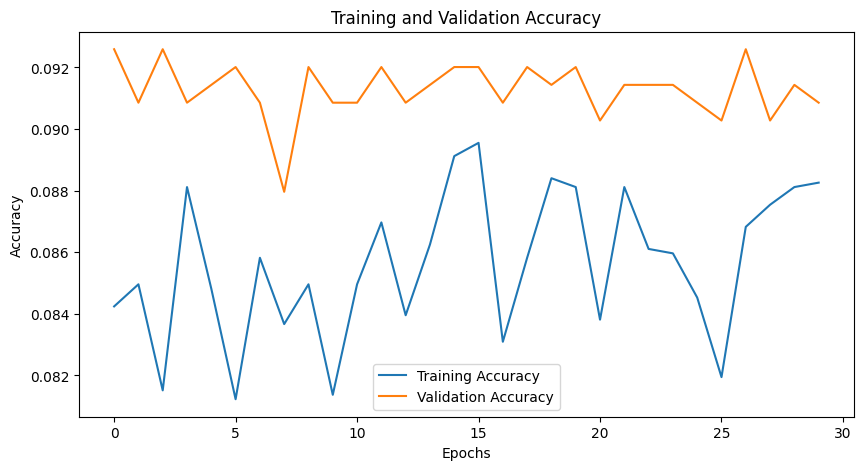

In [ ]:
import matplotlib.pyplot as plt

accuracy = model.history.history['accuracy']
val_accuracy = model.history.history['val_accuracy']
epochs_range = range(epochs)

plt.figure(figsize=(10, 5))
plt.plot(epochs_range, accuracy, label='Training Accuracy')
plt.plot(epochs_range, val_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input

# Load the trained VGG16 model
model = load_model('/content/vgg16.hdf5')

# Function to make predictions on a single image
def predict_single_image(image_path):
    # Load and preprocess the image
    image = load_img(image_path, target_size=(224, 224))
    image_array = img_to_array(image)
    image_array = np.expand_dims(image_array, axis=0)
    processed_image = preprocess_input(image_array)

    # Make the prediction
    predictions = model.predict(processed_image)

    # Decode the predictions (optional, only if you have class labels)
    # Replace 'class_labels' with a list containing the names of your classes
    class_labels = ["Chicken wings, 42 calories per wing", "Cake, 364 calories per 100g","Club sandwich, 591 calories 1 sandwich 268g","Garlic bread, 206 calories in 1 slice","Hamburger, 354 calories per burger", "Ice cream, 137 calories in 1 cup","Macaroni, 310 calories in 249g","Pizza, 285 calories in 1 slice","Samosa,91 calories in one samosa","Spaghetti, 113 calories in 100 grams","Spring rolls, 85 calories in one piece"]
    decoded_predictions = class_labels[np.argmax(predictions)]

    return decoded_predictions

# Example usage:
image_path = '/content/Vegetable-Samosa-Recipe.jpg'
prediction = predict_single_image(image_path)
print("Prediction:", prediction)


1/1 [==============================] - 1s 811ms/step
Prediction: Cake, 364 calories per 100g


VGG-16

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
def build_vgg16(input_shape, num_classes):
    model = Sequential()

    # Convolutional Block 1
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    # Convolutional Block 2
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    # Convolutional Block 3
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    # Convolutional Block 4
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    # Convolutional Block 5
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    # Flatten and Fully Connected layers
    model.add(Flatten())
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    return model


In [ ]:
train_dir = '/content/Datasets2-8/Train'
validation_dir = '/content/Datasets2-8/Test'
image_size = (224, 224)
num_classes = 12 # number of classes in your dataset

In [ ]:
model = build_vgg16(input_shape=(image_size[0], image_size[1], 3), num_classes=num_classes)
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
batch_size = 32

train_datagen = ImageDataGenerator(rescale=1.0/255.0,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=image_size,
                                                    batch_size=batch_size,
                                                    class_mode='categorical')

validation_datagen = ImageDataGenerator(rescale=1.0/255.0)
validation_generator = validation_datagen.flow_from_directory(validation_dir,
                                                              target_size=image_size,
                                                              batch_size=batch_size,
                                                              class_mode='categorical')


Found 8750 images belonging to 11 classes.
Found 2250 images belonging to 11 classes.


In [ ]:
epochs = 30
steps_per_epoch = len(train_generator)
validation_steps = len(validation_generator)

model.fit(train_generator,
          steps_per_epoch=steps_per_epoch,
          epochs=epochs,
          validation_data=validation_generator,
          validation_steps=validation_steps)


Epoch 1/30
274/274 [==============================] - 206s 731ms/step - loss: 2.3983 - accuracy: 0.0807 - val_loss: 2.3983 - val_accuracy: 0.0889
Epoch 2/30
274/274 [==============================] - 192s 698ms/step - loss: 2.3981 - accuracy: 0.0854 - val_loss: 2.3987 - val_accuracy: 0.0889
Epoch 3/30
274/274 [==============================] - 191s 695ms/step - loss: 2.3981 - accuracy: 0.0880 - val_loss: 2.3988 - val_accuracy: 0.0889
Epoch 4/30
274/274 [==============================] - 198s 722ms/step - loss: 2.3980 - accuracy: 0.0882 - val_loss: 2.3990 - val_accuracy: 0.0889
Epoch 5/30
274/274 [==============================] - 199s 725ms/step - loss: 2.3979 - accuracy: 0.0792 - val_loss: 2.3991 - val_accuracy: 0.0889
Epoch 6/30
274/274 [==============================] - 189s 689ms/step - loss: 2.3979 - accuracy: 0.0848 - val_loss: 2.3991 - val_accuracy: 0.0889
Epoch 7/30
274/274 [==============================] - 188s 686ms/step - loss: 2.3979 - accuracy: 0.0871 - val_loss: 2.3991 -

In [ ]:
model.save('2vgg16.hdf5')

######################################## INCEPTION V3

In [ ]:
import os
import shutil
import stat
import seaborn as sns
import collections
import h5py
import numpy as np
import tensorflow as tf
import matplotlib.image as img
import random
import cv2
import PIL
import matplotlib.pyplot as plt
import matplotlib.image as img
from os import listdir
from os.path import isfile, join
from collections import defaultdict
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
from sklearn.model_selection import train_test_split
from skimage.io import imread
from keras.utils.np_utils import to_categorical
from keras.applications.inception_v3 import preprocess_input
from keras.models import load_model
from shutil import copy
from shutil import copytree, rmtree
import tensorflow.keras.backend
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras import regularizers
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, AveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import l2
from tensorflow import keras
from tensorflow.keras import models

%cd content/

%matplotlib inline

[Errno 2] No such file or directory: 'content/'
/content


In [ ]:
class_N = {}
N_class = {}
with open('/content/Datasets2-8/Meta/classes.txt', 'r') as txt:
    classes = [i.strip() for i in txt.readlines()]
    class_N = dict(zip(classes, range(len(classes))))
    N_class = dict(zip(range(len(classes)), classes))
    class_N = {i: j for j, i in N_class.items()}
class_N_sorted = collections.OrderedDict(sorted(class_N.items()))
print(class_N)

# Method to generate directory-file map.
def gen_dir_file_map(path):
    dir_files = defaultdict(list)
    with open(path, 'r') as txt:
        files = [i.strip() for i in txt.readlines()]
        for f in files:
            dir_name, id = f.split('/')
            dir_files[dir_name].append(id + '.jpg')
    return dir_files

# Method to recursively copy a directory.
def copytree(source, target, symlinks = False, ignore = None):
  if not os.path.exists(target):
      os.makedirs(target)
      shutil.copystat(source, target)
  data = os.listdir(source)
  if ignore:
      exclude = ignore(source, data)
      data = [x for x in data if x not in exclude]
  for item in data:
      src = os.path.join(source, item)
      dest = os.path.join(target, item)
      if symlinks and os.path.islink(src):
          if os.path.lexists(dest):
              os.remove(dest)
          os.symlink(os.readlink(src), dest)
          try:
              st = os.lstat(src)
              mode = stat.S_IMODE(st.st_mode)
              os.lchmod(dest, mode)
          except:
              pass
      elif os.path.isdir(src):
          copytree(src, dest, symlinks, ignore)
      else:
          shutil.copy2(src, dest)



# Method to load and resize images.
def load_images(path_to_imgs):
  resize_count = 0

  invalid_count = 0
  all_imgs = []
  all_classes = []

  for i, subdir in enumerate(listdir(path_to_imgs)):
      imgs = listdir(join(path_to_imgs, subdir))
      classN = class_N[subdir]
      for img_name in imgs:
          img_arr = cv2.imread(join(path_to_imgs, subdir, img_name))
          img_arr_rs = img_arr
          img_arr_rs = cv2.resize(img_arr, (200,200),interpolation=cv2.INTER_AREA)
          resize_count += 1
          im_rgb = cv2.cvtColor(img_arr_rs, cv2.COLOR_BGR2RGB)
          all_imgs.append(im_rgb)
          all_classes.append(classN)

  return np.array(all_imgs), np.array(all_classes)

{'Chicken wings, 42 calories per wing': 0, 'Cake, 364 calories per 100g': 1, 'Club sandwich, 591 calories 1 sandwich 268g': 2, 'Garlic bread, 206 calories in 1 slice': 3, 'Hamburger, 354 calories per burger': 4, 'Ice cream, 137 calories in 1 cup': 5, 'Macaroni, 310 calories in 249g': 6, 'Pizza, 285 calories in 1 slice': 7, 'Samosa,91 calories in one samosa': 8, 'Spaghetti, 113 calories in 100 grams': 9, 'Spring rolls, 85 calories in one piece': 10, '': 11}


In [ ]:
# List of all the food classes.
foods_sorted = sorted(os.listdir('/content/Datasets2-8/Test'))
foods_sorted

['Cake, 364 calories per 100g',
 'Chicken wings, 42 calories per wings',
 'Club sandwich, 591 calories 1 sandwich 268g',
 'Garlic bread, 206 calories in 1 slices',
 'Hamburger, 354 calories per burger',
 'Ice cream, 137 calories in 1 cup',
 'Macaroni, 310 calories in 249g',
 'Pizza, 285 calories in 1 silice',
 'Samosa,91 calories in one samosa',
 'Spaghetti , 113 calories in 100 grams',
 'Spring rolls, 85 calories in one piece']

In [ ]:
tensorflow.keras.backend.clear_session()

n_classes = 11
batch_size = 16
width, height = 200, 200
train_data = '/content/Datasets2-8/Train'
test_data = '/content/Datasets2-8/Test'
train_samples = 24000
test_samples = 8000

train_data_gen = ImageDataGenerator(rescale=1. / 255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_data_gen = ImageDataGenerator(rescale=1. / 255)

train_gen = train_data_gen.flow_from_directory(train_data, target_size=(height, width), batch_size=batch_size, class_mode='categorical')

test_gen = test_data_gen.flow_from_directory(test_data, target_size=(height, width), batch_size=batch_size, class_mode='categorical')

inception = InceptionV3(weights='imagenet', include_top=False)
layer = inception.output
layer = GlobalAveragePooling2D()(layer)
layer = Dense(128,activation='relu')(layer)
#layer = Dropout(0.2)(layer)

predictions = Dense(n_classes,kernel_regularizer=regularizers.l2(0.005), activation='softmax')(layer)

model = Model(inputs=inception.input, outputs=predictions)
model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])
checkpointer = ModelCheckpoint(filepath='best_model_101class.hdf5', save_best_only=True)
csv_logger = CSVLogger('history_101class.log')

history_101class = model.fit(train_gen, steps_per_epoch= train_samples // batch_size, validation_data= test_gen, validation_steps= test_samples // batch_size, epochs=30, callbacks=[csv_logger, checkpointer])

model.save('INCEPTIONV3.hdf5')

Found 8750 images belonging to 11 classes.
Found 2250 images belonging to 11 classes.
87910968/87910968 [==============================] - 0s 0us/step


Epoch 1/30
 547/1500 [=========>....................] - ETA: 4:02 - loss: 1.5383 - accuracy: 0.5382

1500/1500 [==============================] - 179s 104ms/step - loss: 1.5383 - accuracy: 0.5382 - val_loss: 2.6610 - val_accuracy: 0.2547


In [ ]:
=======================================================SPLIT DATA SET====================================================

In [ ]:
!unrar x "/content/drive/MyDrive/Train.rar" "/content/"


UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal

Cannot open /content/drive/MyDrive/Train.rar
No such file or directory
No files to extract


In [ ]:
!pip install split-folders
import splitfolders
import os
path = "/content/Train"
print(os.listdir(path))

['Spring rolls, 85 calories in one piece', 'Hamburger, 354 calories per burger', 'Spaghetti , 113 calories in 100 grams', 'Pizza, 285 calories in 1 silice', 'Samosa,91 calories in one samosa', 'Chocolate cake, 352 calories per 95g', 'Macaroni, 310 calories in 249g', 'Garlic bread, 206 calories in 1 slices', 'Chicken wings, 42 calories per wings', 'Ice cream, 137 calories in 1 cup', 'fried_rice', 'Club sandwich, 591 calories 1 sandwich 268g']


In [ ]:
path = "/content/Train"
splitfolders.ratio(path,seed=1337, output="Splited-Dataset", ratio=(0.8, 0, 0.2))

Copying files: 11250 files [00:04, 2560.04 files/s]


==================================================VGG16=====================================

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
def build_vgg16(input_shape, num_classes):
    model = Sequential()

    # Convolutional Block 1
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    # Convolutional Block 2
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    # Convolutional Block 3
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    # Convolutional Block 4
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    # Convolutional Block 5
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    # Flatten and Fully Connected layers
    model.add(Flatten())
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    return model

In [ ]:
train_dir = '/content/Splited-Dataset/train'
validation_dir = '/content/Splited-Dataset/test'
image_size = (32, 32)
num_classes = 12 # number of classes in your dataset

In [ ]:
model = build_vgg16(input_shape=(image_size[0], image_size[1], 3), num_classes=num_classes)
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
batch_size = 32

train_datagen = ImageDataGenerator(rescale=1.0/255.0,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=image_size,
                                                    batch_size=batch_size,
                                                    class_mode='categorical')

validation_datagen = ImageDataGenerator(rescale=1.0/255.0)
validation_generator = validation_datagen.flow_from_directory(validation_dir,
                                                              target_size=image_size,
                                                              batch_size=batch_size,
                                                              class_mode='categorical')

Found 9000 images belonging to 12 classes.
Found 2250 images belonging to 12 classes.


In [ ]:
epochs = 50
steps_per_epoch = len(train_generator)
validation_steps = len(validation_generator)

model.fit(train_generator,
          steps_per_epoch=steps_per_epoch,
          epochs=epochs,
          validation_data=validation_generator,
          validation_steps=validation_steps)


Epoch 1/50
282/282 [==============================] - 81s 221ms/step - loss: 2.4788 - accuracy: 0.0893 - val_loss: 2.4788 - val_accuracy: 0.0889
Epoch 2/50
282/282 [==============================] - 74s 261ms/step - loss: 2.4582 - accuracy: 0.1039 - val_loss: 2.3908 - val_accuracy: 0.1213
Epoch 3/50
282/282 [==============================] - 64s 226ms/step - loss: 2.3691 - accuracy: 0.1452 - val_loss: 2.3427 - val_accuracy: 0.1667
Epoch 4/50
282/282 [==============================] - 72s 257ms/step - loss: 2.3279 - accuracy: 0.1658 - val_loss: 2.3221 - val_accuracy: 0.1560
Epoch 5/50
282/282 [==============================] - 62s 219ms/step - loss: 2.2946 - accuracy: 0.1771 - val_loss: 2.2825 - val_accuracy: 0.1862
Epoch 6/50
282/282 [==============================] - 60s 212ms/step - loss: 2.2767 - accuracy: 0.1852 - val_loss: 2.2515 - val_accuracy: 0.2031
Epoch 7/50
282/282 [==============================] - 60s 213ms/step - loss: 2.2421 - accuracy: 0.1928 - val_loss: 2.2239 - val_ac

In [ ]:
model.save('79vgg16.hdf5')

----------------INCEPTION V3-------------------

In [ ]:
!unrar x "/content/drive/MyDrive/Train.rar" "/content/"

Streaming output truncated to the last 5000 lines.
Extracting  /content/Train/Ice cream, 137 calories in 1 cup/3862358.jpg      55%  OK 
Extracting  /content/Train/Ice cream, 137 calories in 1 cup/3870836.jpg      55%  OK 
Extracting  /content/Train/Ice cream, 137 calories in 1 cup/3871579.jpg      55%  OK 
Extracting  /content/Train/Ice cream, 137 calories in 1 cup/387707.jpg      55%  OK 
Extracting  /content/Train/Ice cream, 137 calories in 1 cup/3885955.jpg      55%  OK 
Extracting  /content/Train/Ice cream, 137 calories in 1 cup/3889308.jpg      55%  OK 
Extracting  /content/Train/Ice cream, 137 calories in 1 cup/3891084.jpg      55%  OK 
Extracting  /content/Train/Ice cream, 137 calories in 1 cup/3892674.jpg      55%  OK 
Extracting  /content/Train/Ice cream, 137 calories in 1 cup/3892705.jpg      55%  OK 
Extracting  /content/Train/Ice cream, 137 calories in 1 cup/389519.jpg      55%  OK 
E

In [ ]:
!pip install split-folders
import splitfolders
import os
path = "/content/Train"
print(os.listdir(path))

['Garlic bread, 206 calories in 1 slices', 'Pizza, 285 calories in 1 silice', 'Club sandwich, 591 calories 1 sandwich 268g', 'fried_rice', 'Chocolate cake, 352 calories per 95g', 'Ice cream, 137 calories in 1 cup', 'Samosa,91 calories in one samosa', 'Spring rolls, 85 calories in one piece', 'Macaroni, 310 calories in 249g', 'Chicken wings, 42 calories per wings', 'Hamburger, 354 calories per burger', 'Spaghetti , 113 calories in 100 grams']


In [ ]:
path = "/content/Train"
splitfolders.ratio(path,seed=42, output="Splited-Dataset", ratio=(0.8, 0.2, 0))

Copying files: 11250 files [00:02, 4933.40 files/s]


In [ ]:
import os
import random
import shutil

# Define the source directory containing the images
source_directory = '/content/Train'

# Define the destination directories for the training and testing sets
train_directory = '/content/sample_data/Train'
test_directory = '/content/sample_data/Test'

# Set the random seed for reproducibility
random_seed = 42
random.seed(random_seed)

# Define the percentage of images to be used for testing
test_percentage = 20

# Create destination directories if they don't exist
os.makedirs(train_directory, exist_ok=True)
os.makedirs(test_directory, exist_ok=True)

# Get a list of all image files in the source directory
image_files = [f for f in os.listdir(source_directory) if os.path.isfile(os.path.join(source_directory, f))]

# Shuffle the image filenames randomly
random.shuffle(image_files)

# Calculate the number of images for testing
num_test_images = int(len(image_files) * (test_percentage / 100.0))

# Split the images into training and testing sets
train_images = image_files[:-num_test_images]
test_images = image_files[-num_test_images:]

# Copy the images to their respective directories
for filename in train_images:
    src_path = os.path.join(source_directory, filename)
    dst_path = os.path.join(train_directory, filename)
    shutil.copy(src_path, dst_path)

for filename in test_images:
    src_path = os.path.join(source_directory, filename)
    dst_path = os.path.join(test_directory, filename)
    shutil.copy(src_path, dst_path)

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

# Load the image dataset
image_paths = []
labels = []
for class_name in os.listdir("/content/Train"):
  class_dir = os.path.join("/content/Train", class_name)
  for image_path in os.listdir(class_dir):
    image_paths.append(os.path.join(class_dir, image_path))
    labels.append(class_name)

# Split the dataset into train, validation, and test sets
x_train, x_test, y_train, y_test = train_test_split(image_paths, labels, test_size=0.25, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=42)

# Save the train, validation, and test sets
np.save("x_train.npy", x_train)
np.save("x_val.npy", x_val)
np.save("x_test.npy", x_test)
np.save("y_train.npy", y_train)
np.save("y_val.npy", y_val)
np.save("y_test.npy", y_test)



In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
import os

# Load the image dataset
image_paths = []
labels = []
for class_name in os.listdir("/content/Train"):
  class_dir = os.path.join("/content/Train", class_name)
  for image_path in os.listdir(class_dir):
    image_paths.append(os.path.join(class_dir, image_path))
    labels.append(class_name)

# Split the dataset into train, validation, and test sets
x_train, x_test, y_train, y_test = train_test_split(image_paths, labels, test_size=0.25, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=42)

# Create the training, validation, and testing image folders
os.makedirs("training_images")
os.makedirs("validation_images")
os.makedirs("testing_images")

# Copy the images to the respective folders
for image_path, label in zip(x_train, y_train):
  os.system(f"cp {image_path} training_images/{label}")
for image_path, label in zip(x_val, y_val):
  os.system(f"cp {image_path} validation_images/{label}")
for image_path, label in zip(x_test, y_test):
  os.system(f"cp {image_path} testing_images/{label}")

In [ ]:
import os
import shutil
import stat
import seaborn as sns
import collections
import h5py
import numpy as np
import tensorflow as tf
import matplotlib.image as img
import random
import cv2
import PIL
import matplotlib.pyplot as plt
import matplotlib.image as img
from os import listdir
from os.path import isfile, join
from collections import defaultdict
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
from sklearn.model_selection import train_test_split
from skimage.io import imread
from keras.utils.np_utils import to_categorical
from keras.applications.inception_v3 import preprocess_input
from keras.models import load_model
from shutil import copy
from shutil import copytree, rmtree
import tensorflow.keras.backend
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras import regularizers
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, AveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger
from tensorflow.keras.optimizers.legacy import SGD
from tensorflow.keras.regularizers import l2
from tensorflow import keras
from tensorflow.keras import models

%cd content/

%matplotlib inline

[Errno 2] No such file or directory: 'content/'
/content


In [ ]:
n_classes = 12
batch_size = 16
width, height = 32, 32
train_data = '/content/Splited-Dataset/train'
test_data = '/content/Splited-Dataset/test'
train_samples = 9000
test_samples = 2250

train_data_gen = ImageDataGenerator(rescale=1. / 255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_data_gen = ImageDataGenerator(rescale=1. / 255)

train_gen = train_data_gen.flow_from_directory(train_data, target_size=(height, width), batch_size=batch_size, class_mode='categorical')

test_gen = test_data_gen.flow_from_directory(test_data, target_size=(height, width), batch_size=batch_size, class_mode='categorical')

inception = InceptionV3(weights='imagenet', include_top=False)
layer = inception.output
layer = GlobalAveragePooling2D()(layer)
layer = Dense(128,activation='relu')(layer)
layer = Dropout(0.2)(layer)

predictions = Dense(n_classes,kernel_regularizer=regularizers.l2(0.005), activation='softmax')(layer)

model = Model(inputs=inception.input, outputs=predictions)
model.compile(optimizer=SGD(learning_rate=0.0001, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])
checkpointer = ModelCheckpoint(filepath='best_model_101class.hdf5', save_best_only=True)
csv_logger = CSVLogger('history_101class.log')

history_101class = model.fit(train_gen, steps_per_epoch= train_samples // batch_size, validation_data= test_gen, validation_steps= test_samples // batch_size, epochs=30, callbacks=[csv_logger, checkpointer])

model.save('INCEPTIONV3.hdf5')

Found 9000 images belonging to 12 classes.
Found 2250 images belonging to 12 classes.
Epoch 1/30


**VGG-19**

In [ ]:
!unrar x "/content/drive/MyDrive/Train.rar" "/content/"

Streaming output truncated to the last 5000 lines.
Extracting  /content/Train/Ice cream, 137 calories in 1 cup/3862358.jpg      55%  OK 
Extracting  /content/Train/Ice cream, 137 calories in 1 cup/3870836.jpg      55%  OK 
Extracting  /content/Train/Ice cream, 137 calories in 1 cup/3871579.jpg      55%  OK 
Extracting  /content/Train/Ice cream, 137 calories in 1 cup/387707.jpg      55%  OK 
Extracting  /content/Train/Ice cream, 137 calories in 1 cup/3885955.jpg      55%  OK 
Extracting  /content/Train/Ice cream, 137 calories in 1 cup/3889308.jpg      55%  OK 
Extracting  /content/Train/Ice cream, 137 calories in 1 cup/3891084.jpg      55%  OK 
Extracting  /content/Train/Ice cream, 137 calories in 1 cup/3892674.jpg      55%  OK 
Extracting  /content/Train/Ice cream, 137 calories in 1 cup/3892705.jpg      55%  OK 
Extracting  /content/Train/Ice cream, 137 calories in 1 cup/389519.jpg      55%  OK 
E

In [ ]:
!pip install split-folders
import splitfolders
import os
path = "/content/Train"
print(os.listdir(path))


['Spring rolls, 85 calories in one piece', 'Chocolate cake, 352 calories per 95g', 'Pizza, 285 calories in 1 silice', 'Chicken wings, 42 calories per wings', 'Macaroni, 310 calories in 249g', 'Samosa,91 calories in one samosa', 'Ice cream, 137 calories in 1 cup', 'Club sandwich, 591 calories 1 sandwich 268g', 'Garlic bread, 206 calories in 1 slices', 'Hamburger, 354 calories per burger', 'fried_rice', 'Spaghetti , 113 calories in 100 grams']


In [ ]:
path = "/content/Train"
splitfolders.ratio(path,seed=42, output="Splited-Dataset", ratio=(0.8, 0.2, 0))

Copying files: 11250 files [00:02, 5193.88 files/s]


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG19
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [ ]:
train_data_dir = '/content/Splited-Dataset/train'
validation_data_dir = '/content/Splited-Dataset/val'
image_size = (224, 224)
batch_size = 32


In [ ]:
train_datagen = ImageDataGenerator(rescale=1.0/255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
train_generator = train_datagen.flow_from_directory(train_data_dir, target_size=image_size, batch_size=batch_size, class_mode='categorical')

validation_datagen = ImageDataGenerator(rescale=1.0/255)
validation_generator = validation_datagen.flow_from_directory(validation_data_dir, target_size=image_size, batch_size=batch_size, class_mode='categorical')

# Step 3: Build the VGG-19 model
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(image_size[0], image_size[1], 3))

# Add custom fully connected layers on top of VGG-19
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)  # Add your desired number of neurons
predictions = Dense(12, activation='softmax')(x)  # Replace 'num_classes' with the number of classes in your dataset

model = Model(inputs=base_model.input, outputs=predictions)

# Step 4: Compile the model
learning_rate = 0.0001
model.compile(optimizer=Adam(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])

# Step 5: Train the model
num_epochs = 50
model.fit(train_generator, steps_per_epoch=len(train_generator), epochs=num_epochs, validation_data=validation_generator, validation_steps=len(validation_generator))

# Step 6: Evaluate the model
# You can evaluate the model's performance on the test dataset using model.evaluate()

# Save the trained model if needed
model.save('vgg19_trained_model.h5')

Found 9000 images belonging to 12 classes.
Found 2250 images belonging to 12 classes.
Epoch 1/50
282/282 [==============================] - 226s 780ms/step - loss: 2.0013 - accuracy: 0.2880 - val_loss: 1.5172 - val_accuracy: 0.4667
Epoch 2/50
282/282 [==============================] - 212s 752ms/step - loss: 1.3746 - accuracy: 0.5322 - val_loss: 1.0800 - val_accuracy: 0.6502
Epoch 3/50
282/282 [==============================] - 211s 748ms/step - loss: 1.0617 - accuracy: 0.6459 - val_loss: 0.9182 - val_accuracy: 0.6969
Epoch 4/50
282/282 [==============================] - 209s 741ms/step - loss: 0.8947 - accuracy: 0.7107 - val_loss: 0.7375 - val_accuracy: 0.7569
Epoch 5/50
282/282 [==============================] - 213s 754ms/step - loss: 0.7812 - accuracy: 0.7480 - val_loss: 0.7022 - val_accuracy: 0.7747
Epoch 6/50
282/282 [==============================] - 216s 765ms/step - loss: 0.6961 - accuracy: 0.7754 - val_loss: 0.8169 - val_accuracy: 0.7338
Epoch 7/50
282/282 [==================

ValueError: ignored

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg19 import preprocess_input, decode_predictions
import numpy as np

# Load the trained VGG-19 model in HDF5 format
model = tf.keras.models.load_model('/content/vgg19_trained_model.h5')

# Function to preprocess the image for prediction
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return x

# Function to make predictions on a single image
def predict_image(image_path):
    preprocessed_image = preprocess_image(image_path)
    predictions = model.predict(preprocessed_image)
    decoded_predictions = decode_predictions(predictions, top=3)[0]
    for _, class_name, probability in decoded_predictions:
        print(f"{class_name}: {probability:.2f}")

# Example: Predict a single image
image_path_to_predict = '/content/Splited-Dataset/val/Ice cream, 137 calories in 1 cup/102595.jpg'
predict_image(image_path_to_predict)

1/1 [==============================] - 1s 796ms/step


ValueError: ignored

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg19 import preprocess_input
import numpy as np

# Load the trained VGG-19 model in HDF5 format
model = tf.keras.models.load_model('/content/vgg19_trained_model.h5')

# Function to preprocess the image for prediction
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return x

# Function to make predictions on a single image
def predict_image(image_path):
    preprocessed_image = preprocess_image(image_path)
    predictions = model.predict(preprocessed_image)[0]
    # Assuming your model has 12 classes, replace it with the actual number of classes in your dataset
    num_classes = 12
    class_labels = [f"Class {i}" for i in range(1, num_classes+1)]
    decoded_predictions = list(zip(class_labels, predictions))
    decoded_predictions.sort(key=lambda x: x[1], reverse=True)
    for class_name, probability in decoded_predictions[:3]:
        print(f"{class_name}: {probability:.2f}")

# Example: Predict a single image
image_path_to_predict = '/content/Splited-Dataset/train/Cake, 352 calories per 95g/1023543.jpg'
predict_image(image_path_to_predict)


1/1 [==============================] - 0s 176ms/step
Class 6: 0.96
Class 2: 0.03
Class 1: 0.01


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Replace 'train_data_dir' and 'image_size' with the appropriate paths and image size used during training
train_data_dir = '/content/Splited-Dataset/train'
image_size = (224, 224)
batch_size = 32

train_datagen = ImageDataGenerator(rescale=1.0/255)
train_generator = train_datagen.flow_from_directory(train_data_dir, target_size=image_size, batch_size=batch_size, class_mode='categorical')

# Get the class indices (dictionary mapping class names to integer labels)
class_indices = train_generator.class_indices

# Print the class names and their corresponding integer labels
for class_name, class_label in class_indices.items():
    print(f"{class_name}: {class_label}")


Found 8800 images belonging to 11 classes.
Bread, 206 calories in 1 slices: 0
Cake, 352 calories per 95g: 1
Chicken wings, 42 calories per wings: 2
Club sandwich, 591 calories 1 sandwich 268g: 3
Hamburger, 354 calories per burger: 4
Ice cream, 137 calories in 1 cup: 5
Macaroni, 310 calories in 249g: 6
Pizza, 285 calories in 1 silice: 7
Samosa, 91 calories in one samosa: 8
Spaghetti , 113 calories in 100 grams: 9
Spring rolls, 85 calories in one piece: 10


                                   **Custom model**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Step 1: Set up the environment
# Make sure you have TensorFlow installed and other necessary libraries

# Step 2: Prepare the dataset
# Replace 'train_data_dir', 'image_size', etc. with your dataset paths and settings
train_data_dir = '/content/Train'
image_size = (224, 224)
batch_size = 32

train_datagen = ImageDataGenerator(rescale=1.0/255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
train_generator = train_datagen.flow_from_directory(train_data_dir, target_size=image_size, batch_size=batch_size, class_mode='categorical')

# Step 3: Build the CNN model
model = Sequential()

# First convolutional layer with 32 filters and 3x3 kernel size
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(image_size[0], image_size[1], 3)))
model.add(MaxPooling2D((2, 2)))

# Second convolutional layer with 64 filters and 3x3 kernel size
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Third convolutional layer with 128 filters and 3x3 kernel size
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Flatten the output and add fully connected layers
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(12, activation='softmax'))  # Assuming 12 food classes

# Step 4: Compile the model
learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])

# Step 5: Train the model
num_epochs = 30
model.fit(train_generator, steps_per_epoch=len(train_generator), epochs=num_epochs)

# Save the trained model if needed
model.save('custom_food_classifier.h5')


Found 11250 images belonging to 12 classes.
Epoch 1/30
352/352 [==============================] - 957s 3s/step - loss: 2.3217 - accuracy: 0.1935
Epoch 2/30
352/352 [==============================] - 962s 3s/step - loss: 2.1496 - accuracy: 0.2691
Epoch 3/30
352/352 [==============================] - 957s 3s/step - loss: 2.0515 - accuracy: 0.3053
Epoch 4/30
352/352 [==============================] - 947s 3s/step - loss: 1.9850 - accuracy: 0.3279
Epoch 5/30
352/352 [==============================] - 948s 3s/step - loss: 1.9333 - accuracy: 0.3535
Epoch 6/30
352/352 [==============================] - 950s 3s/step - loss: 1.8861 - accuracy: 0.3693
Epoch 7/30
352/352 [==============================] - 951s 3s/step - loss: 1.8254 - accuracy: 0.3884
Epoch 8/30
352/352 [==============================] - 953s 3s/step - loss: 1.7888 - accuracy: 0.4023
Epoch 9/30
352/352 [==============================] - 950s 3s/step - loss: 1.7492 - accuracy: 0.4154
Epoch 10/30
352/352 [==========================

**==========================VGG-19========================**

In [ ]:
!unrar x "/content/drive/MyDrive/Train.rar" "/content/"


Streaming output truncated to the last 5000 lines.
Extracting  /content/Train/Macaroni, 310 calories in 249g/1026643.jpg      54%  OK 
Extracting  /content/Train/Macaroni, 310 calories in 249g/1027098.jpg      54%  OK 
Extracting  /content/Train/Macaroni, 310 calories in 249g/1027470.jpg      54%  OK 
Extracting  /content/Train/Macaroni, 310 calories in 249g/1028607.jpg      54%  OK 
Extracting  /content/Train/Macaroni, 310 calories in 249g/1029227.jpg      54%  OK 
Extracting  /content/Train/Macaroni, 310 calories in 249g/1030355.jpg      54%  OK 
Extracting  /content/Train/Macaroni, 310 calories in 249g/1035823.jpg      54%  OK 
Extracting  /content/Train/Macaroni, 310 calories in 249g/1037782.jpg      54%  OK 
Extracting  /content/Train/Macaroni, 310 calories in 249g/1041383.jpg      54%  OK 
Extracting  /content/Train/Macaroni, 310 calories in 249g/1045365.jpg      54%  OK 
Extracting  /conten

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install split-folders
import splitfolders
import os
path = "/content/Train"
print(os.listdir(path))
path = "/content/Train"
splitfolders.ratio(path,seed=42, output="Splited-Dataset", ratio=(0.8, 0.2, 0))

['Spring rolls, 85 calories in one piece', 'Samosa, 91 calories in one samosa', 'Pizza, 285 calories in 1 silice', 'Chicken wings, 42 calories per wings', 'Macaroni, 310 calories in 249g', 'Ice cream, 137 calories in 1 cup', 'Club sandwich, 591 calories 1 sandwich 268g', 'Cake, 352 calories per 95g', 'Hamburger, 354 calories per burger', 'Bread, 206 calories in 1 slices', 'Spaghetti , 113 calories in 100 grams']


Copying files: 11000 files [00:05, 2018.53 files/s]


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG19
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping, ModelCheckpoint

# Step 1: Set up the environment
# Make sure you have TensorFlow installed and other necessary libraries

# Step 2: Prepare the dataset
# Replace 'train_data_dir', 'validation_data_dir', 'image_size', etc. with your dataset paths and settings
train_data_dir = '/content/Splited-Dataset/train'
validation_data_dir = '/content/Splited-Dataset/val'
image_size = (224, 224)
batch_size = 32
num_classes = 11  # Replace with the number of classes in your dataset

train_datagen = ImageDataGenerator(rescale=1.0/255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, rotation_range=30, width_shift_range=0.2, height_shift_range=0.2)
train_generator = train_datagen.flow_from_directory(train_data_dir, target_size=image_size, batch_size=batch_size, class_mode='categorical')
# Get the class indices (dictionary mapping class names to integer labels)
class_indices = train_generator.class_indices

# Print the class names and their corresponding integer labels
for class_name, class_label in class_indices.items():
    print(f"{class_name}: {class_label}")

validation_datagen = ImageDataGenerator(rescale=1.0/255)
validation_generator = validation_datagen.flow_from_directory(validation_data_dir, target_size=image_size, batch_size=batch_size, class_mode='categorical')

# Step 3: Build the VGG-19 model
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(image_size[0], image_size[1], 3))

# Add custom fully connected layers on top of VGG-19
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)  # Add your desired number of neurons
predictions = Dense(num_classes, activation='softmax')(x)  # Replace 'num_classes' with the number of classes in your dataset

model = Model(inputs=base_model.input, outputs=predictions)

# Step 4: Compile the model
learning_rate = 0.0001
model.compile(optimizer=Adam(lr=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])

# Step 5: Train the model with Learning Rate Scheduling and Early Stopping
num_epochs = 100

def lr_schedule(epoch):
    lr = 0.0001
    if epoch > 75:
        lr *= 0.5
    elif epoch > 100:
        lr *= 0.1
    return lr

lr_scheduler = LearningRateScheduler(lr_schedule)
early_stopping = EarlyStopping(patience=5, restore_best_weights=True)

callbacks = [lr_scheduler, early_stopping]

history = model.fit(train_generator, steps_per_epoch=len(train_generator), epochs=num_epochs, validation_data=validation_generator, validation_steps=len(validation_generator), callbacks=callbacks)

# Step 6: Evaluate the model
# You can evaluate the model's performance on the test dataset using model.evaluate()

# Save the trained model if needed
model.save('vgg19_trained_model.h5')


Found 8800 images belonging to 11 classes.
Bread, 206 calories in 1 slices: 0
Cake, 352 calories per 95g: 1
Chicken wings, 42 calories per wings: 2
Club sandwich, 591 calories 1 sandwich 268g: 3
Hamburger, 354 calories per burger: 4
Ice cream, 137 calories in 1 cup: 5
Macaroni, 310 calories in 249g: 6
Pizza, 285 calories in 1 silice: 7
Samosa, 91 calories in one samosa: 8
Spaghetti , 113 calories in 100 grams: 9
Spring rolls, 85 calories in one piece: 10
Found 2200 images belonging to 11 classes.
80134624/80134624 [==============================] - 3s 0us/step


Epoch 1/100


KeyboardInterrupt: ignored

In [ ]:
model.save('vgg19_trained_model.hdf5')

In [ ]:
!pip install deeplake

import deeplake
ds = deeplake.load('hub://activeloop/food-101-dataset-train')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 527.3/527.3 kB 6.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.7/135.7 kB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 75.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.7/72.7 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 49.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.7/132.7 kB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 14.0 MB/s eta 0:00:00
  Created wheel for deeplake: filename=deeplake-3.6.12-py3-none-any.whl s

Opening dataset in read-only mode as you don't have write permissions.


\

This dataset can be visualized in Jupyter Notebook by ds.visualize() or at https://app.activeloop.ai/activeloop/food-101-dataset-train



\

hub://activeloop/food-101-dataset-train loaded successfully.



**MobileNet**

Found 8800 images belonging to 11 classes.
Found 2200 images belonging to 11 classes.
Epoch 1/50
275/275 [==============================] - 242s 716ms/step - loss: 0.8133 - accuracy: 0.7440 - val_loss: 1.1963 - val_accuracy: 0.6614 - lr: 1.0000e-04
Epoch 2/50
275/275 [==============================] - 186s 678ms/step - loss: 0.3514 - accuracy: 0.8880 - val_loss: 0.9988 - val_accuracy: 0.7318 - lr: 1.0000e-04
Epoch 3/50
275/275 [==============================] - 178s 648ms/step - loss: 0.2334 - accuracy: 0.9240 - val_loss: 0.7817 - val_accuracy: 0.7823 - lr: 1.0000e-04
Epoch 4/50
275/275 [==============================] - 175s 635ms/step - loss: 0.1547 - accuracy: 0.9507 - val_loss: 0.6373 - val_accuracy: 0.8223 - lr: 1.0000e-04
Epoch 5/50
275/275 [==============================] - 176s 639ms/step - loss: 0.1146 - accuracy: 0.9631 - val_loss: 0.7039 - val_accuracy: 0.8186 - lr: 1.0000e-04
Epoch 6/50
275/275 [==============================] - 176s 640ms/step - loss: 0.0930 - accuracy: 0.

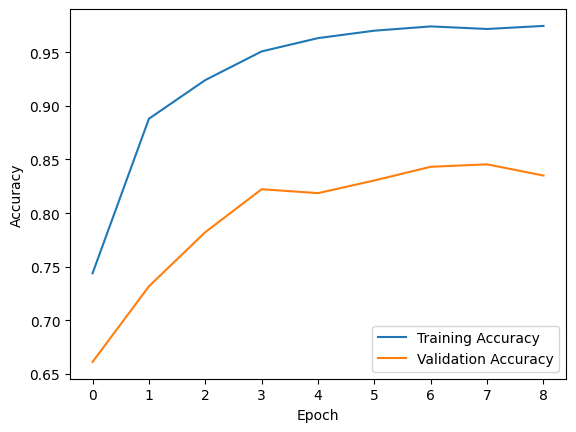

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt

# Step 1: Prepare the dataset
data_dir = '/content/Train'  # Replace this with the path to your dataset
image_size = (224, 224)
batch_size = 32

# Create data generators with data augmentation for training and validation sets
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Split 20% of the data for validation
)

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'  # Use the training subset of the data
)

validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'  # Use the validation subset of the data
)

# Step 2: Build the MobileNetV2 model
num_classes = 11

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(image_size[0], image_size[1], 3))
x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
predictions = tf.keras.layers.Dense(num_classes, activation='softmax')(x)

model = tf.keras.models.Model(inputs=base_model.input, outputs=predictions)

# Step 3: Compile the model
learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Step 4: Train the model
num_epochs = 80

def lr_schedule(epoch):
    lr = 0.0001
    if epoch > 75:
        lr *= 0.5
    elif epoch > 100:
        lr *= 0.1
    return lr

lr_scheduler = LearningRateScheduler(lr_schedule)
early_stopping = EarlyStopping(patience=5, restore_best_weights=True)

callbacks = [lr_scheduler, early_stopping]

history = model.fit(train_generator,
                    steps_per_epoch=len(train_generator),
                    epochs=num_epochs,
                    validation_data=validation_generator,
                    validation_steps=len(validation_generator),
                    callbacks=callbacks)

# Step 5: Plot the training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Step 6: Save the trained model
model.save('mobilenet_model.h5')



In [ ]:

# Step 7: Prediction
# Load the saved model
loaded_model = tf.keras.models.load_model('/content/mobilenet_model.h5')

# Make predictions on a sample test image
test_image_path = '/content/Splited-Dataset/val/Bread, 206 calories in 1 slices/1012618.jpg'  # Replace this with the path to your test image
test_image = tf.keras.preprocessing.image.load_img(test_image_path, target_size=image_size)
test_image = tf.keras.preprocessing.image.img_to_array(test_image)
test_image = test_image / 255.0  # Rescale to [0, 1]
test_image = tf.expand_dims(test_image, axis=0)  # Add batch dimension
predictions = loaded_model.predict(test_image)
predicted_class_index = tf.argmax(predictions, axis=1)[0]
print('Predicted Class Index:', predicted_class_index)

1/1 [==============================] - 1s 759ms/step
Predicted Class Index: tf.Tensor(0, shape=(), dtype=int64)


In [ ]:
model.save('mobilenet_model.hdf5')